In [2]:
from juliacall import Main as jl

[juliapkg] Found dependencies: /home/sasha/anaconda3/envs/inverse-pde/lib/python3.12/site-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /home/sasha/anaconda3/envs/inverse-pde/lib/python3.12/site-packages/juliapkg/juliapkg.json
[juliapkg] Locating Julia ~1.6.1, ~1.7, ~1.8, ~1.9, =1.10.0, ^1.10.3
[juliapkg] Installing Julia 1.11.3 using JuliaUp
[juliapkg] Using Julia 1.11.2 at /home/sasha/.juliaup/bin/julia
[juliapkg] Using Julia project at /home/sasha/anaconda3/envs/inverse-pde/julia_env
[juliapkg] Installing packages:
           julia> import Pkg
           julia> Pkg.Registry.update()
           julia> Pkg.add([Pkg.PackageSpec(name="PythonCall", uuid="6099a3de-0909-46bc-b1f4-468b9a2dfc0d")])
           julia> Pkg.resolve()
           julia> Pkg.precompile()


The latest version of Julia in the `release` channel is 1.11.3+0.x64.linux.gnu. You currently have `1.11.2+0.x64.linux.gnu` installed. Run:

  juliaup update

in your terminal shell to install Julia 1.11.3+0.x64.linux.gnu and update the `release` channel to that version.
  Installing known registries into `~/anaconda3/envs/inverse-pde/share/julia`
       Added `General` registry to ~/anaconda3/envs/inverse-pde/share/julia/registries
    Updating registry at `~/anaconda3/envs/inverse-pde/share/julia/registries/General.toml`
   Resolving package versions...
   Installed MicroMamba ────────────────── v0.1.14
   Installed Scratch ───────────────────── v1.2.1
   Installed Parsers ───────────────────── v2.8.1
   Installed TableTraits ───────────────── v1.0.1
   Installed Tables ────────────────────── v1.12.0
   Installed JSON3 ─────────────────────── v1.14.1
   Installed Preferences ───────────────── v1.4.3
   Installed PythonCall ────────────────── v0.9.24
   Installed DataAPI ─────────────

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [4]:
jl.println("Hello from Julia!")
# Hello from Julia!
x = jl.rand(range(10), 3, 5)
x._jl_display()
# 3×5 Matrix{Int64}:
#  8  1  7  0  6
#  9  2  1  4  0
#  1  8  5  4  0
import numpy
numpy.sum(x, axis=0)
# array([18, 11, 13,  8,  6], dtype=int64)

Hello from Julia!


NameError: name 'array' is not defined

In [6]:
from array import array
jl.seval("using Statistics")
x = array('i', [1, 2, 3])
jl.mean(x)
# 2.0
y = array('i', [2,4,8])
jl.cor(x, y)
# 0.9819805060619657

0.9819805060619657

In [30]:
import numpy as np
Nx = 100
Ny = 100
xs = np.linspace(-1, 1, Nx)
ys = np.linspace(-1, 1, Ny)
mesh = np.stack(np.meshgrid(xs, ys, indexing='xy'), axis= -1).reshape(-1, 2)
print(mesh)


[[-1.         -1.        ]
 [-0.97979798 -1.        ]
 [-0.95959596 -1.        ]
 ...
 [ 0.95959596  1.        ]
 [ 0.97979798  1.        ]
 [ 1.          1.        ]]


In [31]:
from scipy.sparse import coo_array
rangex = np.arange(Nx)
rangey = np.arange(Ny)
gridx, gridy = np.meshgrid(rangex, rangey, indexing='xy')
grid = gridx + gridy * Nx
print(grid)

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


In [32]:
row  = np.concat((grid[:, :-1].reshape(-1), grid[:, 1:].reshape(-1), 
                  grid[:-1, :].reshape(-1), grid[1:, :].reshape(-1),
                  grid[:-1, :-1].reshape(-1), grid[1:, 1:].reshape(-1), 
                  grid[:-1, 1:].reshape(-1), grid[1:, :-1].reshape(-1)))
col  = np.concat((grid[:, :-1].reshape(-1) + 1, grid[:, 1:].reshape(-1) - 1,
                  grid[:-1, :].reshape(-1) + Nx, grid[1:, :].reshape(-1) - Nx,
                  grid[:-1, :-1].reshape(-1) + 1 + Nx, grid[1:, 1:].reshape(-1) - 1 - Nx, 
                  grid[:-1, 1:].reshape(-1) - 1 + Nx, grid[1:, :-1].reshape(-1) - Nx + 1))
print(row)
print(col)

[   0    1    2 ... 9996 9997 9998]
[   1    2    3 ... 9897 9898 9899]


In [33]:
V = (xs[1] - xs[0]) * (ys[1] - ys[0])

In [6]:
#V = 1

In [34]:
data = np.ones(row.size) * V
coo = coo_array((data, (row, col)), shape=(Ny * Nx, Nx * Ny))

In [35]:
import scipy
M = 100
b = np.zeros((Nx * Ny, M))
for i in range(M):
    b[i * (Nx // M), i] = 1
L = scipy.sparse.linalg.spsolve(coo, b).T

/tmp/ipykernel_38866/4137642655.py:6: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  L = scipy.sparse.linalg.spsolve(coo, b).T


In [36]:
L

array([[-1387.27782459,   977.3482    ,   -27.62805544, ...,
        -4666.68056946,    64.62707404,  4685.85142875],
       [  977.3482    , -1414.90588004,  -147.24200029, ...,
         -568.59566167,    19.17085929,    64.62707404],
       [  -27.62805544,  -147.24200029, -1649.49690628, ...,
         3518.49354338,  -568.59566167, -4666.68056946],
       ...,
       [ 2031.12478629,  -361.96012307, -2379.83132278, ...,
        -2169.76410714,  -292.13948682,  1593.91005837],
       [  189.36745753,  -297.4685681 ,  -361.96012307, ...,
         -292.13948682,  -734.68329602,  -578.25056611],
       [-2328.59335439,   189.36745753,  2031.12478629, ...,
         1593.91005837,  -578.25056611, -2328.59335439]],
      shape=(100, 10000))

In [37]:
def potential(x, x0 = 0):
    return 1 / np.linalg.norm(x)

In [38]:
coord_detecors = b.T @ mesh

In [39]:
def get_detectors_signal(coord_detecors, phi_potential):
    res = []
    for point in coord_detecors:
        res.append(phi_potential(point))
    res = np.array(res)
    return res

In [40]:
r = get_detectors_signal(coord_detecors, potential)

In [42]:
print(r)

[0.70710678 0.71428497 0.72153295 0.72884807 0.73622738 0.74366754
 0.7511649  0.75871537 0.76631447 0.7739573  0.78163849 0.78935222
 0.79709215 0.80485145 0.81262276 0.82039817 0.82816921 0.83592685
 0.84366149 0.85136292 0.85902036 0.86662246 0.87415728 0.88161232
 0.88897456 0.89623043 0.9033659  0.91036648 0.91721729 0.9239031
 0.93040839 0.93671744 0.94281439 0.9486833  0.9543083  0.95967364
 0.96476382 0.96956367 0.97405849 0.97823413 0.98207713 0.98557485
 0.9887155  0.99148835 0.99388373 0.99589321 0.99750959 0.99872705
 0.99954118 0.99994899 0.99994899 0.99954118 0.99872705 0.99750959
 0.99589321 0.99388373 0.99148835 0.9887155  0.98557485 0.98207713
 0.97823413 0.97405849 0.96956367 0.96476382 0.95967364 0.9543083
 0.9486833  0.94281439 0.93671744 0.93040839 0.9239031  0.91721729
 0.91036648 0.9033659  0.89623043 0.88897456 0.88161232 0.87415728
 0.86662246 0.85902036 0.85136292 0.84366149 0.83592685 0.82816921
 0.82039817 0.81262276 0.80485145 0.79709215 0.78935222 0.781638

In [43]:
mu = 0.01

In [44]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=mu)
clf.fit(L, r)
s = clf.coef_
s_b = clf.intercept_

/home/sasha/anaconda3/envs/inverse-pde/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.602e-03, tolerance: 8.798e-05
  model = cd_fast.enet_coordinate_descent(


In [45]:
np.sum(s != 0)

np.int64(2531)

In [46]:
np.max(s)

np.float64(3.8080039430821335e-05)

In [47]:
r_ = L @ s + s_b

In [48]:
r_

array([0.70765035, 0.7144507 , 0.72231155, 0.72972507, 0.73698906,
       0.74497601, 0.75243032, 0.76000366, 0.76773314, 0.77522033,
       0.78296598, 0.79051785, 0.79828976, 0.80608888, 0.81383149,
       0.82158517, 0.82953965, 0.83712664, 0.84485823, 0.85264973,
       0.85993013, 0.86751418, 0.8749386 , 0.88200402, 0.88934789,
       0.89631363, 0.90322046, 0.91010535, 0.91673993, 0.92321253,
       0.92964284, 0.93563678, 0.94159434, 0.94759248, 0.95275613,
       0.958525  , 0.96351948, 0.96813511, 0.97305569, 0.97686367,
       0.98085727, 0.98443712, 0.98735752, 0.99035805, 0.99257055,
       0.9946687 , 0.99634011, 0.99737443, 0.99844978, 0.99870772,
       0.99857353, 0.99839907, 0.99747545, 0.99613835, 0.994788  ,
       0.99257335, 0.99020094, 0.98760197, 0.98429873, 0.98089224,
       0.97709   , 0.97281938, 0.96830139, 0.96346587, 0.9583644 ,
       0.95298145, 0.9475097 , 0.94173001, 0.93570361, 0.92975603,
       0.92319523, 0.91678445, 0.91015608, 0.90312943, 0.89642

In [49]:
clf.score(L, r)

0.9998655479723112

In [50]:
grid_s = s.reshape(Ny, Nx)

In [51]:
grid_s_norm = (grid_s / np.max(np.abs(grid_s)))

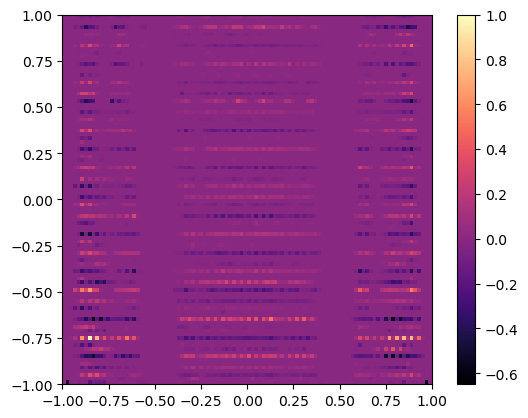

In [52]:
from matplotlib import pyplot as plt
plt.imshow(grid_s_norm, extent=[-1,1,-1,1], cmap = 'magma', origin='lower')
plt.colorbar()
plt.show()